### How does covariance depend on the choice of cosmology?

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


See how coordinates change with different cosmologies:

In [9]:
omega_m = 0.29
w_dark_energy = -1.
omega_k = 0.

input_file = '/mnt/store1/oliverphilcox/DR12_QPM/unprocessed/mock_galaxy_DR12_CMASS_N_QPM_0001.rdzw'

# Load the wcdm module from Daniel Eisenstein
import os,sys
sys.path.insert(0, '/home/oliverphilcox/COMAJE/python/wcdm/')
import wcdm

dat = np.loadtxt(input_file)

In [10]:
ra,dec,z,w=[dat[:,i] for i in range(4)]

In [18]:
comoving_radius=wcdm.coorddist(z,omega_m,w_dark_energy,omega_k)
comoving_radius2=wcdm.coorddist(z,omega_m+0.02,w_dark_energy,omega_k)

(array([24118., 36469., 52187., 68952., 81069., 93451., 96492., 87842.,
        68073., 33398.]),
 array([0.99088271, 0.99118929, 0.99149588, 0.99180246, 0.99210904,
        0.99241563, 0.99272221, 0.99302879, 0.99333538, 0.99364196,
        0.99394854]),
 <a list of 10 Patch objects>)

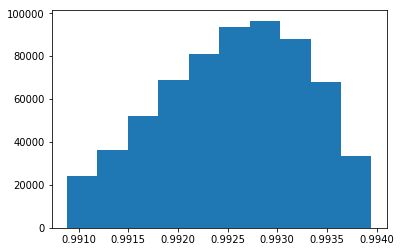

In [21]:
plt.hist(comoving_radius2/comoving_radius)

In [ ]:
      
from astropy.constants import c as c_light
import astropy.units as u

print("Converting z to comoving distances:")
all_comoving_radius=wcdm.coorddist(all_z,omega_m,w_dark_energy,omega_k)

# Convert to Mpc/h
H_0_h=100*u.km/u.s/u.Mpc # to ensure we get output in Mpc/h units
H_0_SI = H_0_h.to(1./u.s)
comoving_radius_Mpc = ((all_comoving_radius/H_0_SI*c_light).to(u.Mpc)).value

# Convert to polar coordinates in radians
all_phi_rad = all_ra*np.pi/180.
all_theta_rad = np.pi/2.-all_dec*np.pi/180.

# Now convert to x,y,z coordinates
all_z = comoving_radius_Mpc*np.cos(all_theta_rad)
all_x = comoving_radius_Mpc*np.sin(all_theta_rad)*np.cos(all_phi_rad)
all_y = comoving_radius_Mpc*np.sin(all_theta_rad)*np.sin(all_phi_rad)

print("Writing to file %s:"%output_file)
# Now write to file:
with open(output_file,"w+") as outfile:
    for p in range(len(all_z)):
        outfile.write("%.8f %.8f %.8f %.8f\n" %(all_x[p],all_y[p],all_z[p],all_w[p]))
print("Output positions (of length %d) written succesfully!"%len(all_z))
